In [1]:
import tensorflow as tf
import numpy as np
from misc import *
import matplotlib.pyplot as plt 
from tqdm import tqdm
import pickle

In [2]:
periods = 40
ppp = 500
train_id = 0

In [3]:


coeffs_A = {}
loss_vals = {}
grads = {}
missing = {}

for train_id in range(9,10):
    coeffs_A[train_id] = []
    loss_vals[train_id] = []
    grads[train_id] = []
    missing[train_id] = []
    for itraj in tqdm(range(1,1000)):
        try:
            coeffs_A[train_id].append(np.load(get_def_path()+"{}periods/{}ppp/{}/training/train_id_{}/Coeffs_A.npy".format(periods,ppp,itraj,train_id)))
            loss_vals[train_id].append(np.load(get_def_path()+"{}periods/{}ppp/{}/training/train_id_{}/total_loss.npy".format(periods,ppp,itraj,train_id)))    
            grads[train_id].append(np.load(get_def_path()+"{}periods/{}ppp/{}/training/train_id_{}/grads.npy".format(periods,ppp,itraj,train_id)))     
        except Exception:
            missing[train_id].append(itraj)

100%|██████████| 999/999 [00:30<00:00, 33.17it/s] 


In [5]:
[len(missing[k]) for k in missing.keys()]

[492]

In [6]:
import os 
collected_path = get_def_path()+"{}periods/{}ppp/training/data_collected/".format(periods,ppp)
os.makedirs(collected_path,exist_ok=True)


In [8]:
with open(collected_path+"coeffsA.pickle", 'wb') as handle:
    pickle.dump(coeffs_A, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
with open(collected_path+"grads.pickle", 'wb') as handle:
    pickle.dump(grads, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
with open(collected_path+"loss_vals.pickle", 'wb') as handle:
    pickle.dump(loss_vals, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
with open(collected_path+"missing.pickle", 'wb') as handle:
    pickle.dump(missing, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
import pickle
with open(collected_path+"coeffsA.pickle", 'rb') as handle:
    coeffs_A = pickle.load(handle)

In [12]:
AA={}
for train_id in coeffs_A.keys():
    AA[train_id] = []
    for k in tqdm(coeffs_A[train_id]):
        AA[train_id].append(k[-1])

100%|██████████| 508/508 [00:00<00:00, 442790.20it/s]


In [13]:
sstds = [np.std(AA[train_id], axis=0) for train_id in AA.keys()]

In [14]:
sstds

[array([[0.6415406, 2.2475197],
        [2.238902 , 0.6393765]], dtype=float32)]

In [15]:
mmeans = [np.mean(AA[train_id], axis=0) for train_id in AA.keys()]

In [16]:
mmeans

[array([[-1.030065 ,  3.2364964],
        [-3.172012 , -1.0456165]], dtype=float32)]

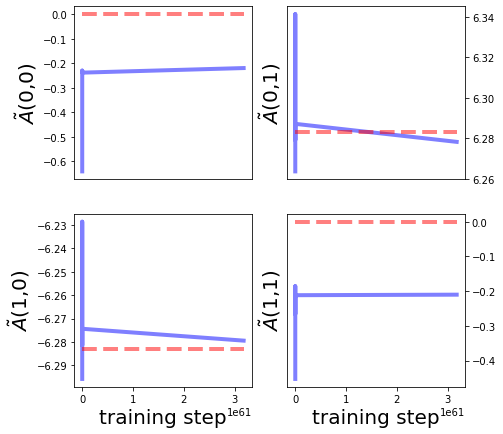

In [30]:
times = np.linspace(0,periods,ppp*periods)

truncation_times = [k for k in np.logspace(times[10],np.log10(times[-1]), 10)]

epochs = 10**np.array(truncation_times[3:-1])

lbsize = 20
fig=plt.figure(figsize=(7,7))
for i in range(4):
    ax=plt.subplot(221+i)
    ax.plot(epochs,np.array(mmeans[3:])[:,i//2,i%2], linewidth=4, color="blue", alpha=0.5)
    ax.plot(epochs, [0,2*np.pi,-2*np.pi,0][i]*np.ones(len(epochs)), '--',linewidth=4, alpha=0.5, color="red")
allaxes = fig.get_axes()
for ind,ax in enumerate(allaxes):
    ax.set_xlabel("training step",size=lbsize)
    ax.set_ylabel(r'$\tilde{A}$'+"({},{})".format(ind//2,ind%2),size=lbsize)
    ax.tick_params(axis='both', which='major', labelsize=10)
    if ind%2 == 1:
        ax.yaxis.tick_right()
    if ind//2 == 0:
        ax.set_xticks([])
        ax.set_xlabel("")